# Principal Component Analysis with Cancer Data

In [3]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
from scipy import stats
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [418]:
data = pd.read_csv('breast-cancer-wisconsin-data.csv')
data.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [419]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [420]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [421]:
data.shape

(699, 11)

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [422]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [423]:
data.notnull().count()

ID                             699
ClumpThickness                 699
Cell Size                      699
Cell Shape                     699
Marginal Adhesion              699
Single Epithelial Cell Size    699
Bare Nuclei                    699
Normal Nucleoli                699
Bland Chromatin                699
Mitoses                        699
Class                          699
dtype: int64

No null values in the data set.

In [424]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?

In [425]:
data['Bare Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [426]:
# There are 16 missing values in the column. We need to devise strategy to fill in the values

In [427]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [428]:
data.mean()
#No mean returned for the column

ID                             1.071704e+06
ClumpThickness                 4.417740e+00
Cell Size                      3.134478e+00
Cell Shape                     3.207439e+00
Marginal Adhesion              2.806867e+00
Single Epithelial Cell Size    3.216023e+00
Normal Nucleoli                3.437768e+00
Bland Chromatin                2.866953e+00
Mitoses                        1.589413e+00
Class                          2.689557e+00
dtype: float64

In [429]:
data.median()
#No median for the column

ID                             1171710.0
ClumpThickness                       4.0
Cell Size                            1.0
Cell Shape                           1.0
Marginal Adhesion                    1.0
Single Epithelial Cell Size          2.0
Normal Nucleoli                      3.0
Bland Chromatin                      1.0
Mitoses                              1.0
Class                                2.0
dtype: float64

In [430]:
data.mode()
#Mode value returned so use this

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1182404,1,1,1,1,2,1,2,1,1,2


Since the mode is the only one which returns some value for the column, replace the missing value with mode.

In [431]:
#Replace the ? with the mode value of the column.
data.replace('?', data.mode(), inplace=True)
data

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [432]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [433]:
#Since the column is still object check for still missing values ?
data['Bare Nuclei'].value_counts()

1     418
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

So no more missing values

In [434]:
#Since the descrive function showed as object convert column into integer.
data['Bare Nuclei'] = data['Bare Nuclei'].astype(int)

In [435]:
data.dtypes

ID                             int64
ClumpThickness                 int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int32
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
Class                          int64
dtype: object

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [436]:
#Remove ID column as it does not add any significance
data.drop('ID',axis=1, inplace=True)

In [440]:
#Check for correlation of variable
corr = data.corr()
corr

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Cell Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Cell Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Normal Nucleoli,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Bland Chromatin,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


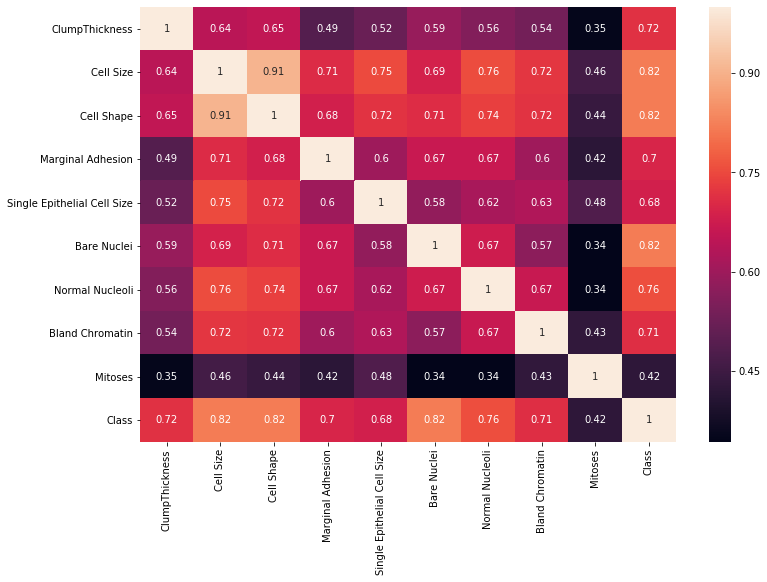

In [439]:
#Heat Map to show the correlation
plt.figure(figsize=(12, 8))
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);

In [315]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

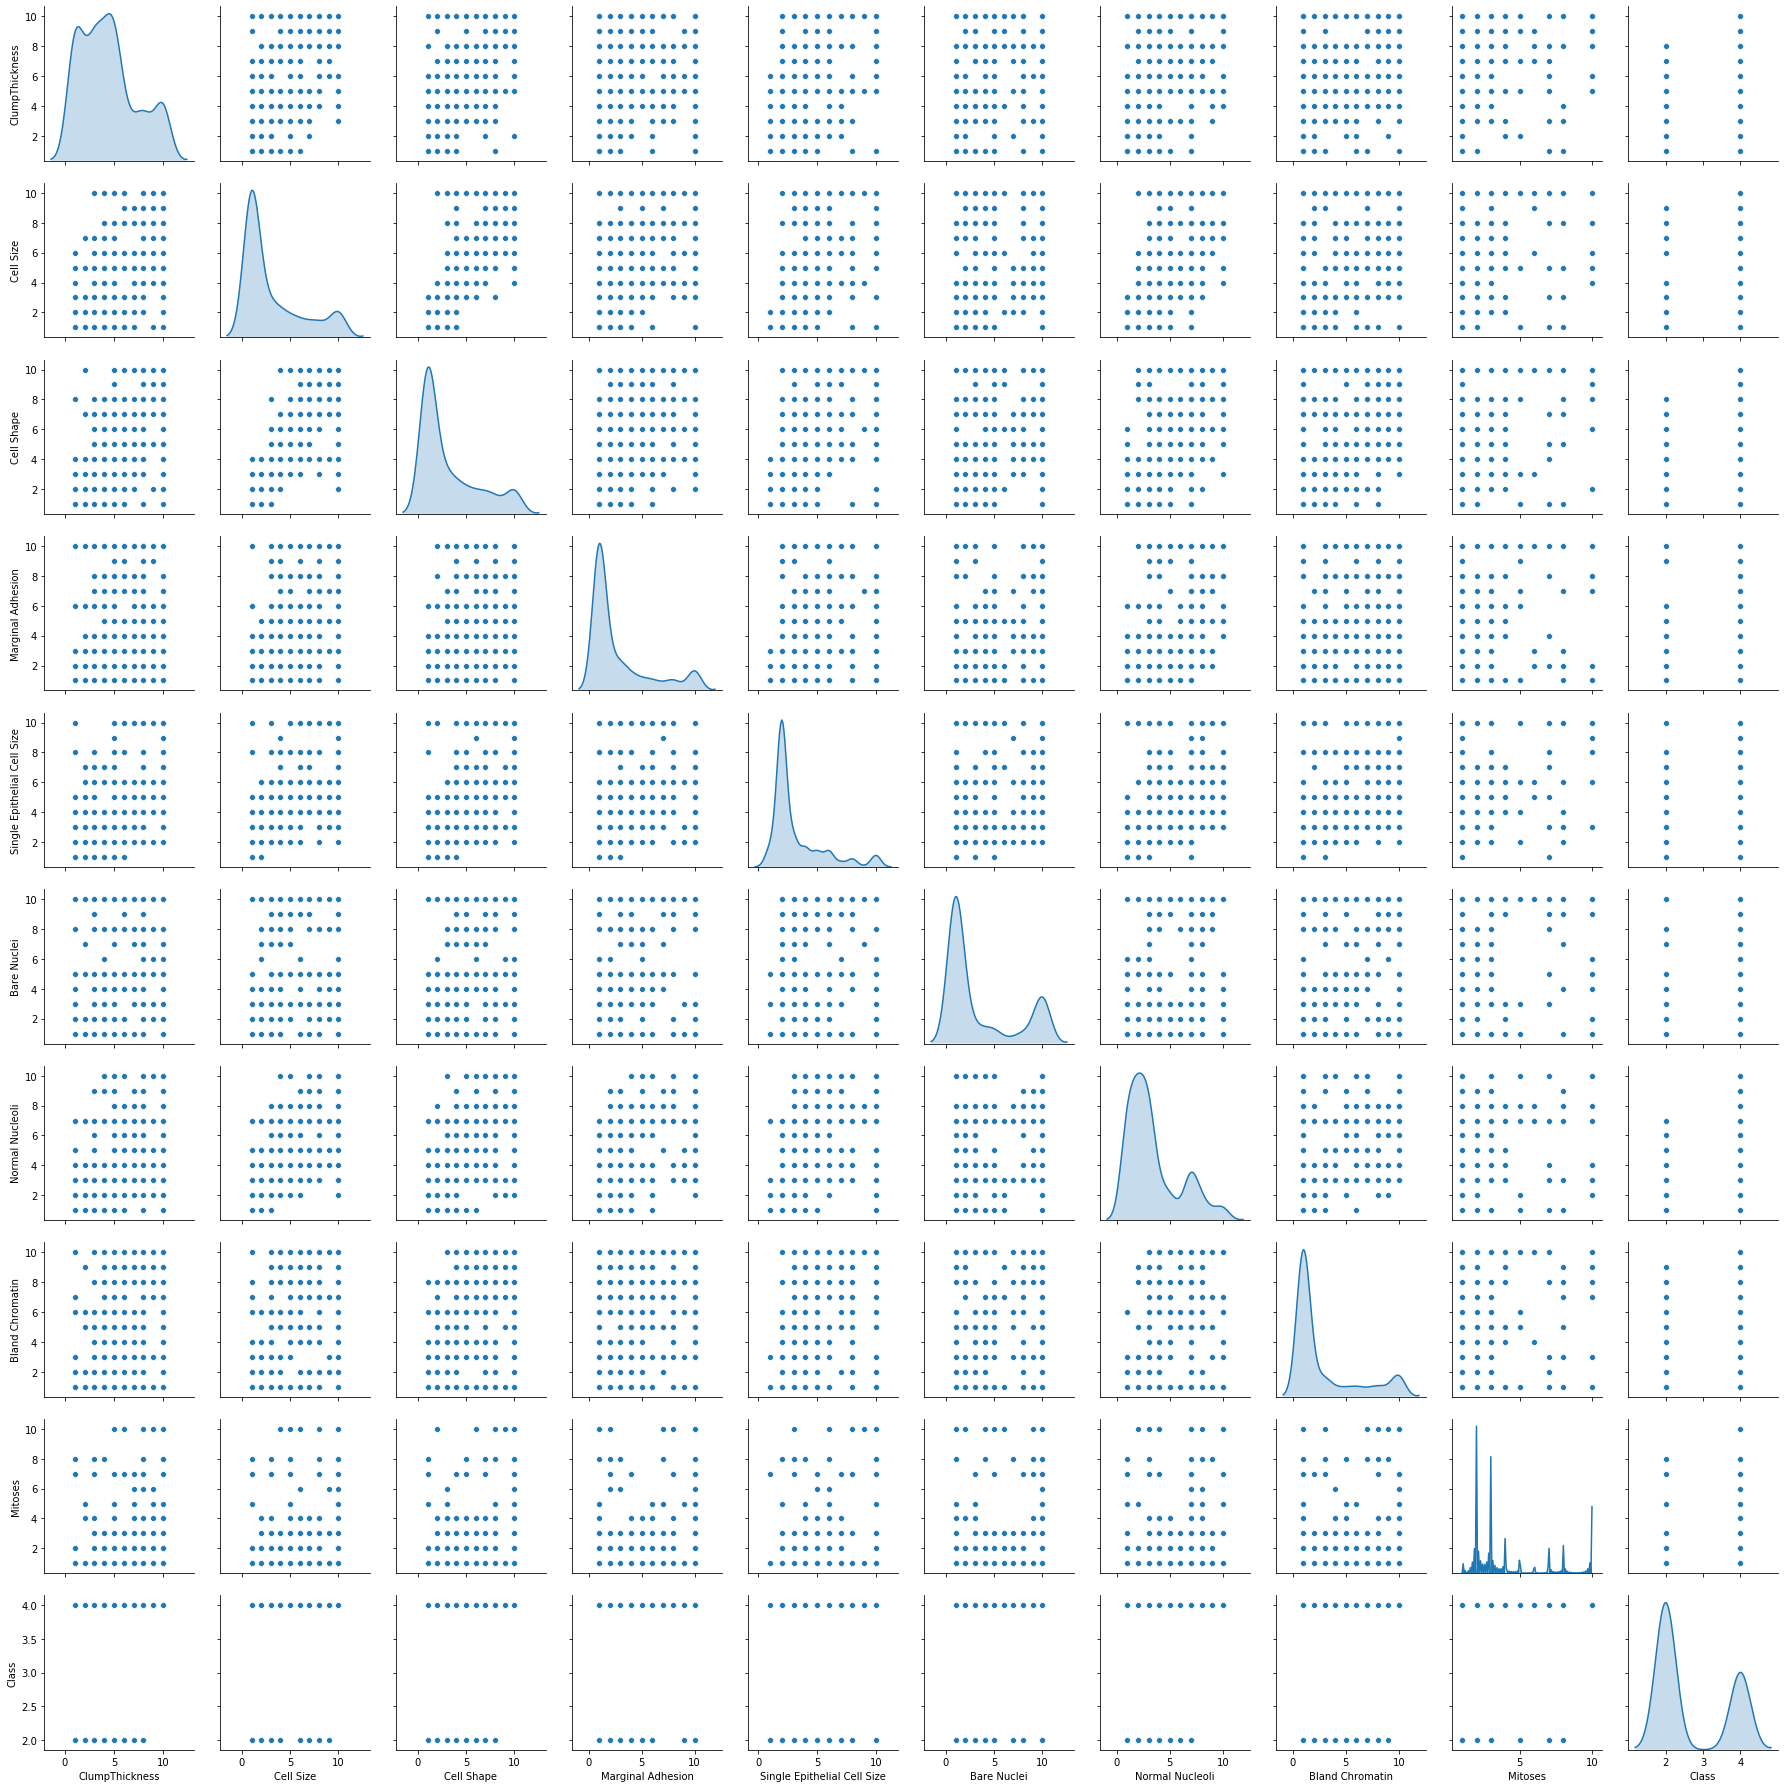

In [317]:
#Let us check for pair plots
import seaborn as sns
sns.pairplot(data,diag_kind='kde')

In [318]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [319]:
data.describe()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.486409,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.621929,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [452]:
z = np.abs(stats.zscore(data))
print(z)

[[0.20693572 0.69999505 0.74329904 ... 0.61182504 0.33214761 0.72539705]
 [0.20693572 0.28384518 0.2668747  ... 0.28411186 0.33214761 0.72539705]
 [0.50386559 0.69999505 0.74329904 ... 0.61182504 0.33214761 0.72539705]
 ...
 [0.20693572 2.25152563 2.28722218 ... 2.33759359 0.98700681 1.37855538]
 [0.14846494 1.59563215 0.94032386 ... 1.02674087 0.33214761 1.37855538]
 [0.14846494 1.59563215 1.61377302 ... 0.37131451 0.33214761 1.37855538]]


In [450]:
#We will keep the threshold = 3
print(np.where(z < -3))

(array([], dtype=int64), array([], dtype=int64))


No values in lower extreme

In [453]:
print(np.where(z > 3))

(array([  8,  14,  20,  50,  57,  99, 124, 126, 159, 205, 210, 213, 237,
       261, 289, 302, 305, 308, 320, 353, 361, 381, 487], dtype=int64), array([8, 8, 8, 8, 8, 8, 4, 8, 8, 8, 8, 8, 8, 8, 8, 4, 8, 8, 8, 8, 8, 8,
       8], dtype=int64))


Many values in higher extreme

In [454]:
# Replace outliers with max values which is 3rd quantile value + 1.5*IRQ
# Take the values in an array
maxValueRange = data.quantile([0.75]).values + 1.5 * (data.quantile([0.75]).values - data.quantile([0.25]).values)
maxValueRange

array([[12. , 11. , 11. ,  8.5,  7. , 11. ,  9.5,  8.5,  1. ,  7. ]])

In [456]:
#Store the outlier columns and rows
outlierRows = np.where(z > 3)[0]
outlierColumns = np.where(z > 3)[1]

In [457]:
for i in range(outlierRows.size): 
        data.at[outlierRows[i], data.columns[outlierColumns[i]]] = maxValueRange[0][outlierColumns[i]]

In [458]:
data

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
5,8,10,10,8,7,10,9,7,1,4
6,1,1,1,1,2,10,3,1,1,2
7,2,1,2,1,2,1,3,1,1,2
8,2,1,1,1,2,1,1,1,1,2
9,4,2,1,1,2,1,2,1,1,2


In [459]:
# We could see most of the outliers are now removed.

# Q6 Create a covariance matrix for identifying Principal components

In [460]:
# PCA
# Step 1 - Create covariance m
X =  data.drop("Class", axis=1)
y =  data.pop("Class")
X_std = StandardScaler().fit_transform(X)

In [461]:
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00143266 0.64583645 0.65552689 0.48705303 0.54035021 0.5908535
  0.5592282  0.53660222 0.302932  ]
 [0.64583645 1.00143266 0.90818117 0.70659267 0.77780227 0.68765657
  0.75680368 0.72390044 0.29825603]
 [0.65552689 0.90818117 1.00143266 0.68405782 0.7485228  0.70848734
  0.73700282 0.72047704 0.28106262]
 [0.48705303 0.70659267 0.68405782 1.00143266 0.63200212 0.66792658
  0.66767051 0.60421681 0.24893838]
 [0.54035021 0.77780227 0.7485228  0.63200212 1.00143266 0.62166986
  0.64717514 0.67498985 0.29747503]
 [0.5908535  0.68765657 0.70848734 0.66792658 0.62166986 1.00143266
  0.67518063 0.5756016  0.31693953]
 [0.5592282  0.75680368 0.73700282 0.66767051 0.64717514 0.67518063
  1.00143266 0.66683179 0.24149579]
 [0.53660222 0.72390044 0.72047704 0.60421681 0.67498985 0.5756016
  0.66683179 1.00143266 0.29001987]
 [0.302932   0.29825603 0.28106262 0.24893838 0.29747503 0.31693953
  0.24149579 0.29001987 1.00143266]]


In [462]:
cov_matrix.shape

(9, 9)

# Q7 Identify eigen values and eigen vector

In [463]:
# Step 2- Get eigen values and eigen vector

In [464]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [465]:
eig_vals

array([5.81237104, 0.88616494, 0.53495018, 0.0886434 , 0.47771957,
       0.25170561, 0.35077587, 0.31531709, 0.29524626])

In [466]:
eig_vecs

array([[-0.30702787, -0.10153091,  0.86706648, -0.00279854,  0.01254582,
        -0.22183076, -0.04141652,  0.30169138, -0.03890958],
       [-0.38347615,  0.09222528, -0.00433108, -0.73386203,  0.17152985,
         0.38389405,  0.1894335 , -0.09005378, -0.29167864],
       [-0.38022397,  0.10254935,  0.06161911,  0.66488061,  0.14483219,
         0.54498458,  0.16681863, -0.13032118, -0.19040376],
       [-0.33428058,  0.11937516, -0.35856258,  0.04733479, -0.4753436 ,
        -0.0554344 ,  0.04867013,  0.69446117, -0.1718393 ],
       [-0.34846928,  0.04603742, -0.19502195,  0.07567358,  0.33228542,
        -0.56224658,  0.60708143, -0.10043805,  0.16588907],
       [-0.34056351, -0.01835831,  0.07414946, -0.08177804, -0.59216694,
         0.12353881,  0.05193275, -0.36567956,  0.60757848],
       [-0.35058146,  0.1435804 , -0.09739062,  0.06008962, -0.13608246,
        -0.40740945, -0.50532037, -0.44920755, -0.44915989],
       [-0.33902733,  0.04617805, -0.18970485, -0.02696735,  0

# Q8 Find variance and cumulative variance by each eigen vector

In [467]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
print('Variance Explained', var_exp)

Variance Explained [64.48950856375255, 9.832190919782114, 5.935387491086292, 5.300401559725173, 3.8919338691576613, 3.4985110730198077, 3.2758208788068846, 2.792727997175544, 0.9835176474939616]


In [468]:
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 64.48950856  74.32169948  80.25708697  85.55748853  89.4494224
  92.94793348  96.22375436  99.01648235 100.        ]


# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [469]:
pca = PCA(n_components=7)

In [470]:
X_reduced = pca.fit_transform(X_std)

In [471]:
X_reduced

array([[-1.45762022,  0.00704493, -0.61067453, ..., -0.24841707,
         0.03554362,  0.24969201],
       [ 1.67302791, -0.44865606,  0.23936611, ...,  1.76520095,
        -0.31494763, -1.1490997 ],
       [-1.58176049, -0.06005109, -0.01484957, ..., -0.20462947,
        -0.27993396,  0.05416492],
       ...,
       [ 4.26360752,  0.86178831,  1.0633236 , ..., -0.20278041,
        -0.88529832,  0.75157996],
       [ 2.33870315, -1.03675956,  0.61535997, ..., -1.45170629,
        -1.0294275 ,  1.30672672],
       [ 2.77234621, -1.1372283 ,  0.66021892, ..., -0.61760926,
        -1.1836553 ,  1.55633728]])

# Q10 Find correlation between components and features

In [472]:
pca.components_

array([[ 0.30702787,  0.38347615,  0.38022397,  0.33428058,  0.34846928,
         0.34056351,  0.35058146,  0.33902733,  0.1646357 ],
       [ 0.10153091, -0.09222528, -0.10254935, -0.11937516, -0.04603742,
         0.01835831, -0.1435804 , -0.04617805,  0.9649948 ],
       [-0.86706648,  0.00433108, -0.06161911,  0.35856258,  0.19502195,
        -0.07414946,  0.09739062,  0.18970485,  0.16373259],
       [ 0.01254582,  0.17152985,  0.14483219, -0.4753436 ,  0.33228542,
        -0.59216694, -0.13608246,  0.49385605,  0.0021649 ],
       [-0.04141652,  0.1894335 ,  0.16681863,  0.04867013,  0.60708143,
         0.05193275, -0.50532037, -0.55213841, -0.0274229 ],
       [ 0.30169138, -0.09005378, -0.13032118,  0.69446117, -0.10043805,
        -0.36567956, -0.44920755,  0.23568153, -0.02168292],
       [ 0.03890958,  0.29167864,  0.19040376,  0.1718393 , -0.16588907,
        -0.60757848,  0.44915989, -0.48637596,  0.11247358]])

In [473]:
df = pd.DataFrame(pca.components_)

In [477]:
df.columns = X.columns
df

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.307028,0.383476,0.380224,0.334281,0.348469,0.340564,0.350581,0.339027,0.164636
1,0.101531,-0.092225,-0.102549,-0.119375,-0.046037,0.018358,-0.143580,-0.046178,0.964995
2,-0.867066,0.004331,-0.061619,0.358563,0.195022,-0.074149,0.097391,0.189705,0.163733
3,0.012546,0.171530,0.144832,-0.475344,0.332285,-0.592167,-0.136082,0.493856,0.002165
4,-0.041417,0.189433,0.166819,0.048670,0.607081,0.051933,-0.505320,-0.552138,-0.027423
5,0.301691,-0.090054,-0.130321,0.694461,-0.100438,-0.365680,-0.449208,0.235682,-0.021683
6,0.038910,0.291679,0.190404,0.171839,-0.165889,-0.607578,0.449160,-0.486376,0.112474


# Content Based Recommendation System - Optional ( Q11 - Q19 will not be graded)

# Q11 Read the Dataset `movies_metadata.csv`

# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

Hint:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

# Q17  Create cosine similarity matrix

# Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

# Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [4]:
ratings1 = pd.read_csv('jokes.csv')
ratings1.head(10)

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,100,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,47,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,100,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,100,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,72,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [5]:
ratings = ratings1.iloc[:200, 1:]

In [6]:
ratings

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


# Q22 Change the column indices from 0 to 99

In [7]:
ratings.columns = list(range(0,100))
ratings

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [8]:
ratings.replace(99.00, 0, inplace=True)
ratings

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,0.00,0.00,0.00,0.00,8.59,-9.85,7.72,8.79,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,2.33,0.00,0.00,0.00,0.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,0.00,4.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


# Q24 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [9]:
ratings_diff = StandardScaler().fit_transform(ratings)
ratings_diff

array([[-1.85701632,  1.67164929, -2.21918089, ..., -0.02685824,
        -0.04144395, -0.16095388],
       [ 0.78949409, -0.1802773 ,  1.3727099 , ...,  0.07059963,
        -1.36765027,  0.16746078],
       [-0.11788091, -0.12112987, -0.0532842 , ..., -0.02685824,
        -0.04144395, -0.16095388],
       ...,
       [ 0.46479617, -0.89412566, -0.3156133 , ..., -0.23610604,
         0.18266036, -0.02590486],
       [-0.11788091, -0.12112987, -0.0532842 , ..., -0.02685824,
        -0.04144395, -0.16095388],
       [ 1.12308784, -1.60593445, -1.07569506, ..., -0.02685824,
        -0.04144395, -0.16095388]])

### Popularity based recommendation system

# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [11]:
# Take the rating_diff into a dataframe.
ratings_diff_df = pd.DataFrame(ratings_diff,columns=ratings.columns)

In [12]:
ratingMean = ratings_diff_df.mean()

In [20]:
#Top 10 joke ids
for val in ratingMean.sort_values(ascending=False).head(10).index:
    print(val)

98
81
97
20
94
92
47
73
99
49
